Top 5 routes - FBPROPHET

|Depart - Destination Station|2018/2|scale & rounding|upper|2019/1|scale & rounding|upper|Remark
|----------------------------|------|----------------|-----|------|----------------|-----|------
|12 CU Terrace - 04 Engineering|69.9%|0.5 and 3|N|56.1%|0.1 and 9|N|logistics 0-5/0-6|
|04 Engineering - 12 CU Terrace|78.0%|0.8 and 3|N|57.0%|0.5 and 4|N|logistic no/0-3|
|12 CU Terrace - 03 Sala Prakeaw|81.6%|0.3 and 7|Y|80.0%|0.1 and 9|Y|logistics 0-3 both|
|02 Economics - 22 Siam Square Soi 8|80.5%|0.5 and 6|Y|72.6%|0.9 and 6|N|logistics 0-3, 0-4|
|04 Engineering - 21 Wittayakit Building|79.8%|0.6 and 4.5|Y|-|-|-|logistics 0-3|
|02 Economics - 21 Wittayakit Building|-|-|-|71.1%|0.9 and 8|N|logistics 0-4|
|02 Economics - 12 CU Terrace|-|-|-|68.1%|0.8 and 9|Y|logistics 0-4|

Top 5 routes - SARIMAX

|Depart - Destination Station|2018/2|SARIMAX|AIC|round|2019/1|SARIMAX|AIC|round|
|----------------------------|------|-------|---|-----|------|-------|---|-----|
|12 CU Terrace - 04 Engineering|69.1%|(1,0,2)x(2,0,2,15)|808.3|6|55.6%|(0,0,2)x(2,0,2,15)|837.0|6|
|04 Engineering - 12 CU Terrace|70.2%|(0,0,0)x(1,0,2,15)|562.0|5|65.9%|(0,0,0)x(2,0,2,15)|439.5|5|
|12 CU Terrace - 03 Sala Prakeaw|79.3%|(1,0,2)x(2,0,2,15)|528.5|4|82.2%|(0,0,1)x(2,0,2,15)|252.3|6|
|02 Economics - 22 Siam Square Soi 8|79.2%|(0,0,2)x(2,0,2,15)|532.7|4|73.3%|(0,0,0)x(1,0,2,15)|566.8|7|
|04 Engineering - 21 Wittayakit Building|80.4%|(2,0,0)x(2,0,2,15)|466.4|4|-|-|-|-|
|02 Economics - 21 Wittayakit Building|-|-|-|-|65.3%|(0,0,2)x(2,0,2,15)|544.2|7|
|02 Economics - 12 CU Terrace|-|-|-|-|73.3%|(2,0,0)x(2,0,2,15)|559.1|3|

Depart Station: 12 CU Terrace

|Destination Station|2018/2|scale & rounding|upper|2019/1|scale & rounding|upper|Remark
|-------------------|------|----------------|-----|------|----------------|-----|------
|01 Exit to Cham square|79.2%|0.4 and 1|N|84.4%|0.8 and 7|Y|weird trend afterwards(both)|
|02 Economics|85.3%|0.5 and 5|N|84.4%|0.2 and 6|N||
|03 Sala Prakeaw|82.8%|0.1 and 3|N|77.8%|0.1 and 5|N||
|04 Engineering|74.7%|0.6 and 0.37|N|56.1%|0.1 and 9|N||
|05 Arts|94.5%|0.1 and 4|Y|78.7%|0.8 and 6|Y||
|06 Chamchuri 9|97.0%|0.4 and 4|Y|60.0%|0.1 and 9|Y||
|07 Chamchuri 5|100%|-|-|100%|-|-|underfit|
|08 Witthaya Nives|100%|-|-|100%|-|-|underfit|
|09 Chamchuri 10|90.3%|02 and 3|N|88.9%|0.2 and 8|N||
|10 Chulaphat 14|100%|-|-|100%|-|-|underfit|
|11 BTS-National stadium|88.3%|0.1 and 5|N|80%|0.1 and 3|N||
|12 CU Terrace|93.9%|0.2 and 1|N|88.9%|0.9 and 3|N|no logistics|
|13 Suan Luang sqaure|100%|-|-|100%|-|-|no data|
|14 I'm Park|100%|-|-|100%|-|-|underfit|
|15 U Center|100%|-|-|100%|-|-|underfit and weird trend, no logistics|
|16 Communication Arts|81.2%|0.3 and 2|N|80.0%|0.1 and 4|N|underfit|
|17 Property office|100%|-|-|100%|-|-|underfit|
|18 Art and Culture|81.2%|0.8 and 2|N|86.7%|0.9 and 4|N|no logistics|
|19 Pharmaceutical Science|100%|-|-|19.5%|-|-|2018/2 underfit, 2019/1 weird trend|
|20 Veterinary Science|94.5%|0.2 and 2|N|71.1%|0.5 and 2|N|no logistics|
|21 Wittayakit Building|85.5%|0.1 and 3|Y|91.1%|0.6 and 6|Y|no logistics|
|22 Siam Square Soi 8|77.0%|0.1 and 4|Y|88.9%|0.9 and 8|Y||
|average|86.4%|-|-|79.1%|-|-||

In [39]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import math
import warnings
warnings.filterwarnings('ignore')

import fbprophet

In [40]:
df_merged_no_hol = pd.read_csv('no_hol_v2_edited.csv')
df_2018s2 = pd.read_csv('2018_2_no_exam.csv')
df_2019s1 = pd.read_csv('2019_1.csv')
df_closed = pd.read_csv('closed_semester.csv')

frames = [df_2018s2, df_2019s1]
joined = pd.concat(frames)
# df = joined[joined['Station_depart.'] == '12 CU Terrace']
df = joined
weather_2018s2 = pd.read_csv('2018s2_weather.csv')

In [41]:
df_o = df[df['Station_depart.'] == '12 CU Terrace']
df_od = df_o[df_o['Station_dest.'] == '04 Engineering']

df_od

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.
52,7/1/2019,8:44:00,9:02:11,9:08:28,CP#0PFV4,12 CU Terrace,04 Engineering
53,7/1/2019,8:50:49,8:51:18,8:58:37,CP#0PVP6,12 CU Terrace,04 Engineering
54,7/1/2019,11:05:15,11:06:27,11:11:10,CP#0PGZ3,12 CU Terrace,04 Engineering
55,7/1/2019,12:37:46,12:39:18,12:44:42,CP#0PVP6,12 CU Terrace,04 Engineering
56,7/1/2019,13:39:56,13:40:42,13:45:58,CP#0S822,12 CU Terrace,04 Engineering
...,...,...,...,...,...,...,...
5679,27/9/2019,12:27:03,12:43:14,12:50:36,CP#0VBN2,12 CU Terrace,04 Engineering
5680,27/9/2019,16:16:45,16:22:32,16:27:29,CP#0SF89,12 CU Terrace,04 Engineering
5788,30/9/2019,7:59:18,NaN,NaN,CP#0SZM7,12 CU Terrace,04 Engineering
5789,30/9/2019,8:32:13,8:32:46,8:38:59,CP#0V2Y4,12 CU Terrace,04 Engineering


In [42]:
df_od['DateTime'] = df_od[df_od.columns[0:2]].apply(lambda x : '/' .join(x.astype(str)),axis=1)
df_od['DateTime'] = df_od['DateTime'].str.replace(":", "/")


demand = []
demand = [1.0] * len(df_od)
df_od['Demand'] = demand
df_od

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,DateTime,Demand
52,7/1/2019,8:44:00,9:02:11,9:08:28,CP#0PFV4,12 CU Terrace,04 Engineering,7/1/2019/8/44/00,1.0
53,7/1/2019,8:50:49,8:51:18,8:58:37,CP#0PVP6,12 CU Terrace,04 Engineering,7/1/2019/8/50/49,1.0
54,7/1/2019,11:05:15,11:06:27,11:11:10,CP#0PGZ3,12 CU Terrace,04 Engineering,7/1/2019/11/05/15,1.0
55,7/1/2019,12:37:46,12:39:18,12:44:42,CP#0PVP6,12 CU Terrace,04 Engineering,7/1/2019/12/37/46,1.0
56,7/1/2019,13:39:56,13:40:42,13:45:58,CP#0S822,12 CU Terrace,04 Engineering,7/1/2019/13/39/56,1.0
...,...,...,...,...,...,...,...,...,...
5679,27/9/2019,12:27:03,12:43:14,12:50:36,CP#0VBN2,12 CU Terrace,04 Engineering,27/9/2019/12/27/03,1.0
5680,27/9/2019,16:16:45,16:22:32,16:27:29,CP#0SF89,12 CU Terrace,04 Engineering,27/9/2019/16/16/45,1.0
5788,30/9/2019,7:59:18,NaN,NaN,CP#0SZM7,12 CU Terrace,04 Engineering,30/9/2019/7/59/18,1.0
5789,30/9/2019,8:32:13,8:32:46,8:38:59,CP#0V2Y4,12 CU Terrace,04 Engineering,30/9/2019/8/32/13,1.0


In [43]:
df_od['Date'] = pd.to_datetime(df_od['Date'], dayfirst=True)
df_od.set_index('Date', inplace=True)
# df_train = df_train_clone = df_od[:'2019-04-30']
# df_test = df_test_clone = df_od['2019-05-01':'2019-05-23']
df_train = df_train_clone = df_od[:'2019-03-22']
df_test = df_test_clone = df_od['2019-03-25':'2019-05-03']
df_train2 = df_train_clone2 = df_od['2019-08-13':'2019-09-20']
df_test2 = df_test_clone2 = df_od['2019-09-23':'2019-09-27']
# df_cv = df_cv_clone = df_od[:'2019-05-23']
df_train_clone.reset_index(inplace=True)
df_test_clone.reset_index(inplace=True)
df_train_clone2.reset_index(inplace=True)
df_test_clone2.reset_index(inplace=True)
# df_cv_clone = df_cv_clone.reset_index(inplace=True)
df_train_clone

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,DateTime,Demand
0,2019-01-07,8:44:00,9:02:11,9:08:28,CP#0PFV4,12 CU Terrace,04 Engineering,7/1/2019/8/44/00,1.0
1,2019-01-07,8:50:49,8:51:18,8:58:37,CP#0PVP6,12 CU Terrace,04 Engineering,7/1/2019/8/50/49,1.0
2,2019-01-07,11:05:15,11:06:27,11:11:10,CP#0PGZ3,12 CU Terrace,04 Engineering,7/1/2019/11/05/15,1.0
3,2019-01-07,12:37:46,12:39:18,12:44:42,CP#0PVP6,12 CU Terrace,04 Engineering,7/1/2019/12/37/46,1.0
4,2019-01-07,13:39:56,13:40:42,13:45:58,CP#0S822,12 CU Terrace,04 Engineering,7/1/2019/13/39/56,1.0
...,...,...,...,...,...,...,...,...,...
150,2019-03-21,12:33:02,12:53:02,12:58:40,CP#0S6F7,12 CU Terrace,04 Engineering,21/3/2019/12/33/02,1.0
151,2019-03-22,8:47:17,8:48:45,8:56:32,CP#0SZM7,12 CU Terrace,04 Engineering,22/3/2019/8/47/17,1.0
152,2019-03-22,9:13:44,9:38:56,9:44:25,CP#0S6F7,12 CU Terrace,04 Engineering,22/3/2019/9/13/44,1.0
153,2019-03-22,9:19:54,NaN,NaN,CP#0SR63,12 CU Terrace,04 Engineering,22/3/2019/9/19/54,1.0


In [44]:
start = 7
stop = 21
days_forecast = len(list(dict.fromkeys(df_test_clone['Date'])))
#14*15+45 or 18*15+60 (train = :2019-03-29) or  for 2018/2, 6 for 2019/1
hours_multiplier = 15
prediction_size = days_forecast*hours_multiplier

In [45]:
df_od.reset_index(inplace=True)
df_od

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,DateTime,Demand
0,2019-01-07,8:44:00,9:02:11,9:08:28,CP#0PFV4,12 CU Terrace,04 Engineering,7/1/2019/8/44/00,1.0
1,2019-01-07,8:50:49,8:51:18,8:58:37,CP#0PVP6,12 CU Terrace,04 Engineering,7/1/2019/8/50/49,1.0
2,2019-01-07,11:05:15,11:06:27,11:11:10,CP#0PGZ3,12 CU Terrace,04 Engineering,7/1/2019/11/05/15,1.0
3,2019-01-07,12:37:46,12:39:18,12:44:42,CP#0PVP6,12 CU Terrace,04 Engineering,7/1/2019/12/37/46,1.0
4,2019-01-07,13:39:56,13:40:42,13:45:58,CP#0S822,12 CU Terrace,04 Engineering,7/1/2019/13/39/56,1.0
...,...,...,...,...,...,...,...,...,...
426,2019-09-27,12:27:03,12:43:14,12:50:36,CP#0VBN2,12 CU Terrace,04 Engineering,27/9/2019/12/27/03,1.0
427,2019-09-27,16:16:45,16:22:32,16:27:29,CP#0SF89,12 CU Terrace,04 Engineering,27/9/2019/16/16/45,1.0
428,2019-09-30,7:59:18,NaN,NaN,CP#0SZM7,12 CU Terrace,04 Engineering,30/9/2019/7/59/18,1.0
429,2019-09-30,8:32:13,8:32:46,8:38:59,CP#0V2Y4,12 CU Terrace,04 Engineering,30/9/2019/8/32/13,1.0


In [46]:
def fill_missing(df, df_main, type):
    date = list(dict.fromkeys(df_main['Date']))
    if (type == True):
        oper_time = list(np.arange(start, stop, 0.5))
    else:
        oper_time = list(np.arange(start, stop))
    timestamp_all = []

    for each in date:
        each = str(each)
        each = each[0:11]
        for h in oper_time:
            (y, m, d) = each.split('-')
            d, m, y, hh = int(d), int(m), int(y), int(h)
            if (((h*10)%10) == 5):
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh, minute=30)
            else:
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
            timestamp_all.append(timestamp)

    timestamp_fill = list(set(timestamp_all) - set((list(dict.fromkeys(df_main['Timestamp'])))))
    
    demand_fill = []
    demand_fill = [0.0] * len(timestamp_fill)

    data_fill = {'Timestamp': timestamp_fill, 'Demand': demand_fill}    
    df_od_fill = pd.DataFrame(data_fill)
    df_od_fill.sort_values('Timestamp', inplace=True)
    df_od_fill.reset_index(drop=True, inplace=True)
    
    df, backup = group_by_time(df)
    
    df = df.append(df_od_fill)
    df.sort_values('Timestamp', inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    return df

def group_by_time(df):
    df = df.groupby('Timestamp').sum()
    backup = df
    df.reset_index(inplace=True)
    
    return df, backup

def create_window(df, type):
    converted_regist = []

    for slot in df['regist_dt_ICT']:
        (h, m, s) = slot.split(':')
        if (type == True):
            if (int(m) >= 30):
                time = int(h) + 0.5
            else:
                time = int(h)
        else:
            time = int(h)
        converted_regist.append(time)    

    df['Converted_Regist'] = converted_regist

    df = df[df['Converted_Regist'] >= start]
    df = df[df['Converted_Regist'] < stop]
    df = df.drop(['Converted_Regist'], axis=1)
    
    return df

def create_timestamp(df, type):
    timestamp_converted = []
    for slot in df['DateTime']:
        (d, m, y, hh, mm, ss) = slot.split('/')
        d, m, y, hh, mm = int(d), int(m), int(y), int(hh), int(mm)
        if (type == True):
            if (mm >= 30):
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh, minute=30)
            else:
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
        else:
            timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
        timestamp_converted.append(timestamp)
    df['Timestamp'] = timestamp_converted
    
    return df

In [47]:
def convert24(df):
    time24 = []
    for each in df['Time']:
        if each[-2:] == 'AM':
            new = each[:-3]+':00'
        elif each[-2:] == 'PM' and each[:2] == '12':
            new = each[:-3]+':00'
        else:
            new = str(int(each[:each.find(':')])+12)+each[each.find(':'):-3]+':00'
        time24.append(new)
    df['Time'] = time24
    
    return df

def extract_num(df):
    temp = []
    humidity = []
    windspeed = []
    pressure = []
    
    for t,h,w,p in zip(df['Temperature'], df['Humidity'], df['Windspeed'], df['Pressure']):
        tt = float(t[0:2])
        hh = float(h[0:2])
        ww = float(w[0:2])
        pp = float(p[0:5])
        temp.append(tt)
        humidity.append(hh)
        windspeed.append(ww)
        pressure.append(pp)
    
    df['Temperature'] = temp
    df['Humidity'] = humidity
    df['Windspeed'] = windspeed
    df['Pressure'] = pressure
    
    return df

In [48]:
weather_2018s2 = convert24(weather_2018s2)

weather_2018s2['DateTime'] = weather_2018s2[weather_2018s2.columns[0:2]].apply(lambda x : '/' .join(x.astype(str)),axis=1)
weather_2018s2['DateTime'] = weather_2018s2['DateTime'].str.replace(":", "/")

weather_2018s2 = create_timestamp(weather_2018s2, True)
weather_2018s2 = extract_num(weather_2018s2)
weather_2018s2

,Date,Time,Temperature,Dew Point,Humidity,Wind,Windspeed,Wind Gust,Pressure,Precipitation,Condition,Half,DateTime,Timestamp
0,07/01/2019,7:00:00,77.0,73 F,89.0,NNW,3.0,0 mph,29.90,0.0 in,Fair,N,07/01/2019/7/00/00,2019-01-07 07:00:00
1,07/01/2019,7:30:00,75.0,73 F,94.0,N,3.0,0 mph,29.93,0.0 in,Fair,Y,07/01/2019/7/30/00,2019-01-07 07:30:00
2,07/01/2019,8:00:00,77.0,72 F,83.0,NNE,5.0,0 mph,29.93,0.0 in,Fair,N,07/01/2019/8/00/00,2019-01-07 08:00:00
3,07/01/2019,8:30:00,79.0,73 F,83.0,NNE,6.0,0 mph,29.93,0.0 in,Fair,Y,07/01/2019/8/30/00,2019-01-07 08:30:00
4,07/01/2019,9:00:00,79.0,73 F,83.0,NNE,5.0,0 mph,29.93,0.0 in,Fair,N,07/01/2019/9/00/00,2019-01-07 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,03/05/2019,18:30:00,95.0,75 F,53.0,SSE,12.0,0 mph,29.70,0.0 in,Fair,Y,03/05/2019/18/30/00,2019-05-03 18:30:00
2124,03/05/2019,19:00:00,93.0,75 F,56.0,SSE,12.0,0 mph,29.73,0.0 in,Fair,N,03/05/2019/19/00/00,2019-05-03 19:00:00
2125,03/05/2019,19:30:00,91.0,77 F,63.0,S,8.0,0 mph,29.73,0.0 in,Fair,Y,03/05/2019/19/30/00,2019-05-03 19:30:00
2126,03/05/2019,20:00:00,91.0,77 F,63.0,SSW,13.0,0 mph,29.76,0.0 in,Fair,N,03/05/2019/20/00/00,2019-05-03 20:00:00


In [49]:
df_train_clone = create_timestamp(df_train_clone, False)
train_framed = create_window(df_train_clone, False)
train, backup_train = group_by_time(train_framed)
train = train_clone = fill_missing(train, df_train_clone, False)
train

,Timestamp,Demand
0,2019-01-07 07:00:00,0.0
1,2019-01-07 08:00:00,2.0
2,2019-01-07 09:00:00,0.0
3,2019-01-07 10:00:00,0.0
4,2019-01-07 11:00:00,1.0
...,...,...
625,2019-03-22 16:00:00,0.0
626,2019-03-22 17:00:00,0.0
627,2019-03-22 18:00:00,0.0
628,2019-03-22 19:00:00,0.0


In [50]:
train_merged = train.join(weather_2018s2.set_index('Timestamp'), on='Timestamp')
train_merged = train_merged[['Timestamp', 'Demand', 'Temperature', 'Humidity', 'Windspeed', 'Pressure']]
train_merged

,Timestamp,Demand,Temperature,Humidity,Windspeed,Pressure
0,2019-01-07 07:00:00,0.0,77.0,89.0,3.0,29.90
1,2019-01-07 08:00:00,2.0,77.0,83.0,5.0,29.93
2,2019-01-07 09:00:00,0.0,79.0,83.0,5.0,29.93
3,2019-01-07 10:00:00,0.0,82.0,79.0,7.0,29.96
4,2019-01-07 11:00:00,1.0,86.0,70.0,12.0,29.93
...,...,...,...,...,...,...
625,2019-03-22 16:00:00,0.0,99.0,42.0,9.0,29.70
626,2019-03-22 17:00:00,0.0,97.0,50.0,9.0,29.70
627,2019-03-22 18:00:00,0.0,95.0,53.0,10.0,29.70
628,2019-03-22 19:00:00,0.0,91.0,52.0,7.0,29.70


In [51]:
# train_regressor = train_merged[['Timestamp', 'Temperature', 'Humidity', 'Windspeed', 'Pressure']]
# train_regressor

In [52]:
df_test_clone = create_timestamp(df_test_clone, False)
test_framed = create_window(df_test_clone, False)
test, backup_test = group_by_time(test_framed)
test = test_clone = fill_missing(test, df_test_clone, False)
test

,Timestamp,Demand
0,2019-03-25 07:00:00,0.0
1,2019-03-25 08:00:00,1.0
2,2019-03-25 09:00:00,0.0
3,2019-03-25 10:00:00,0.0
4,2019-03-25 11:00:00,0.0
...,...,...
359,2019-05-03 16:00:00,0.0
360,2019-05-03 17:00:00,0.0
361,2019-05-03 18:00:00,0.0
362,2019-05-03 19:00:00,0.0


In [53]:
test_merged = test.join(weather_2018s2.set_index('Timestamp'), on='Timestamp')
test_merged = test_merged[['Timestamp', 'Demand', 'Temperature', 'Humidity', 'Windspeed', 'Pressure']]
test_merged

,Timestamp,Demand,Temperature,Humidity,Windspeed,Pressure
0,2019-03-25 07:00:00,0.0,81.0,84.0,7.0,29.84
1,2019-03-25 08:00:00,1.0,82.0,84.0,7.0,29.87
2,2019-03-25 09:00:00,0.0,86.0,74.0,8.0,29.87
3,2019-03-25 10:00:00,0.0,86.0,74.0,12.0,29.90
4,2019-03-25 11:00:00,0.0,88.0,70.0,10.0,29.90
...,...,...,...,...,...,...
359,2019-05-03 16:00:00,0.0,10.0,44.0,7.0,29.67
360,2019-05-03 17:00:00,0.0,97.0,47.0,13.0,29.70
361,2019-05-03 18:00:00,0.0,95.0,49.0,10.0,29.70
362,2019-05-03 19:00:00,0.0,93.0,56.0,12.0,29.73


In [61]:
for_future = test_merged.iloc[0:140]
for_future

,Timestamp,Demand,Temperature,Humidity,Windspeed,Pressure
0,2019-03-25 07:00:00,0.0,81.0,84.0,7.0,29.84
1,2019-03-25 08:00:00,1.0,82.0,84.0,7.0,29.87
2,2019-03-25 09:00:00,0.0,86.0,74.0,8.0,29.87
3,2019-03-25 10:00:00,0.0,86.0,74.0,12.0,29.90
4,2019-03-25 11:00:00,0.0,88.0,70.0,10.0,29.90
...,...,...,...,...,...,...
135,2019-04-05 16:00:00,0.0,97.0,44.0,8.0,29.76
136,2019-04-05 17:00:00,0.0,95.0,44.0,9.0,29.73
137,2019-04-05 18:00:00,0.0,91.0,55.0,13.0,29.76
138,2019-04-05 19:00:00,0.0,88.0,55.0,13.0,29.81


In [ ]:
# test_regressor = test_merged[['Temperature', 'Humidity', 'Windspeed', 'Pressure']]
# test_regressor

In [ ]:
df_train_clone2 = create_timestamp(df_train_clone2, False)
train_framed2 = create_window(df_train_clone2, False)
train2, backup_train2 = group_by_time(train_framed2)
train2 = train_clone2 = fill_missing(train2, df_train_clone2, False)
train2

In [ ]:
df_test_clone2 = create_timestamp(df_test_clone2, False)
test_framed2= create_window(df_test_clone2, False)
test2, backup_test2 = group_by_time(test_framed2)
test2 = test_clone2 = fill_missing(test2, df_test_clone2, False)
test2

In [ ]:
# cv, backup_cv = group_by_time(df_cv)
# cv = fill_missing(cv, df_cv_clone)
# cv

In [ ]:
# df_prophet = cv[['Timestamp', 'Demand']]
# df_prophet = df_prophet.rename(columns={'Timestamp': 'ds', 'Demand': 'y'})
# df_prophet

In [ ]:
train_clone.set_index('Timestamp', inplace=True)
test_clone.set_index('Timestamp', inplace=True)
train_clone2.set_index('Timestamp', inplace=True)
test_clone2.set_index('Timestamp', inplace=True)

plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(train_clone)
plt.plot(test_clone)
plt.subplot(212)
plt.plot(train_clone2)
plt.plot(test_clone2)

In [54]:
df_prophet = train_merged
df_prophet.rename(columns={'Timestamp': 'ds', 'Demand': 'y'}, inplace=True)
df_prophet

,ds,y,Temperature,Humidity,Windspeed,Pressure
0,2019-01-07 07:00:00,0.0,77.0,89.0,3.0,29.90
1,2019-01-07 08:00:00,2.0,77.0,83.0,5.0,29.93
2,2019-01-07 09:00:00,0.0,79.0,83.0,5.0,29.93
3,2019-01-07 10:00:00,0.0,82.0,79.0,7.0,29.96
4,2019-01-07 11:00:00,1.0,86.0,70.0,12.0,29.93
...,...,...,...,...,...,...
625,2019-03-22 16:00:00,0.0,99.0,42.0,9.0,29.70
626,2019-03-22 17:00:00,0.0,97.0,50.0,9.0,29.70
627,2019-03-22 18:00:00,0.0,95.0,53.0,10.0,29.70
628,2019-03-22 19:00:00,0.0,91.0,52.0,7.0,29.70


In [55]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)
df_prophet['cap'] = 5
df_prophet['floor'] = 0
m = Prophet(growth='logistic', changepoint_prior_scale=0.5)
# m = Prophet(changepoint_prior_scale=0.5)
# m.add_regressor('Temperature')
# m.add_regressor('Humidity')
# m.add_regressor('Windspeed')
# m.add_regressor('Pressure')
m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [56]:
future = m.make_future_dataframe(periods=168, freq='H', include_history=False)
future['cap'] = 5
future['floor'] = 0
future = future[(future['ds'].dt.hour >= start) & (future['ds'].dt.hour < stop)]
future = future[future['ds'].dt.dayofweek < 5]
future.reset_index(drop=True, inplace=True)
# future['Temperature'] = for_future[['Temperature']]
# future['Humidity'] = for_future['Humidity']
# future['Windspeed'] = for_future['Windspeed']
# future['Pressure'] = for_future['Pressure']
forecast = m.predict(future)
yhat_round = []
for each in forecast['yhat']:
    if(each < 0):
        each = 0
    elif ((each*10)%10 >= 3):
        each = math.ceil(each)
    else:
        each = math.floor(each)
    yhat_round.append(each)
forecast['yhat_nr'] = forecast['yhat']
forecast['yhat'] = yhat_round
forecast[['ds', 'yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_nr,yhat_lower,yhat_upper
0,2019-03-25 07:00:00,0,0.240683,-0.345221,0.833150
1,2019-03-25 08:00:00,1,0.862238,0.320073,1.447244
2,2019-03-25 09:00:00,1,0.700648,0.149719,1.261319
3,2019-03-25 10:00:00,1,0.335529,-0.265900,0.868622
4,2019-03-25 11:00:00,0,0.183771,-0.393852,0.755521
...,...,...,...,...,...
65,2019-03-29 16:00:00,0,0.045114,-0.505046,0.583320
66,2019-03-29 17:00:00,0,0.100026,-0.446449,0.707507
67,2019-03-29 18:00:00,0,0.047211,-0.540505,0.569664
68,2019-03-29 19:00:00,0,-0.100539,-0.620760,0.457705


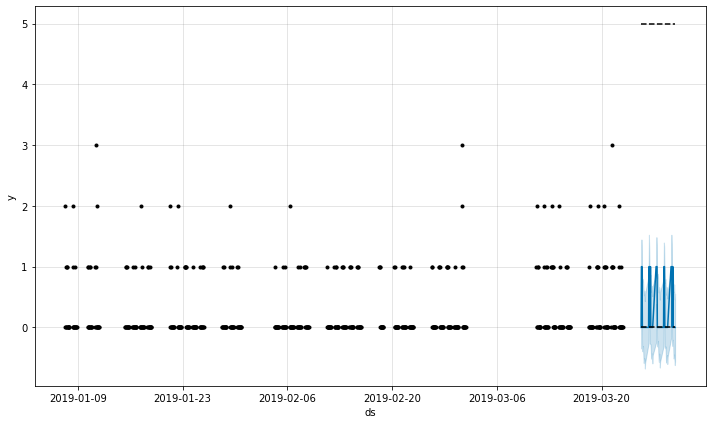

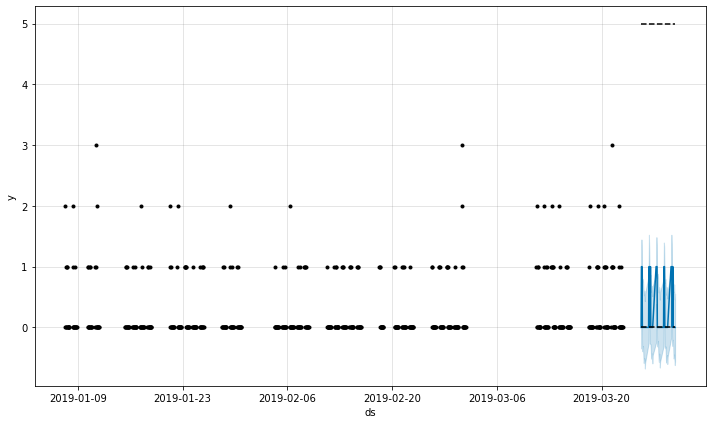

In [57]:
m.plot(forecast)

In [58]:
def join_eva(train, forecast, prediction_size):
    forecast = forecast[:prediction_size]
    
    return forecast.set_index('ds')[['yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']].join(train.set_index('ds'))

def cal_SMAPE(df):
    print(df)
    smape = 100/len(df) * np.sum(2 * np.abs(df['yhat'] - df['y']) / (np.abs(df['y']) + np.abs(df['yhat'])))
    
    return 'sMAPE', smape, 'accuracy', 100-smape

In [59]:
train = join_eva(df_prophet, forecast, len(df_prophet))

print(cal_SMAPE(train))

                     yhat   yhat_nr  yhat_lower  yhat_upper   y  Temperature  \
ds                                                                             
2019-03-25 07:00:00     0  0.240683   -0.345221    0.833150 NaN          NaN   
2019-03-25 08:00:00     1  0.862238    0.320073    1.447244 NaN          NaN   
2019-03-25 09:00:00     1  0.700648    0.149719    1.261319 NaN          NaN   
2019-03-25 10:00:00     1  0.335529   -0.265900    0.868622 NaN          NaN   
2019-03-25 11:00:00     0  0.183771   -0.393852    0.755521 NaN          NaN   
...                   ...       ...         ...         ...  ..          ...   
2019-03-29 16:00:00     0  0.045114   -0.505046    0.583320 NaN          NaN   
2019-03-29 17:00:00     0  0.100026   -0.446449    0.707507 NaN          NaN   
2019-03-29 18:00:00     0  0.047211   -0.540505    0.569664 NaN          NaN   
2019-03-29 19:00:00     0 -0.100539   -0.620760    0.457705 NaN          NaN   
2019-03-29 20:00:00     0  0.001214   -0

In [63]:
def join_test(test, forecast, prediction_size):
    df_test = test.rename(columns={'Timestamp': 'ds', 'Demand': 'y'})
#     forecast = forecast[len(df_prophet):len(df_prophet)+prediction_size]
    joined = forecast.set_index('ds')[['yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']].join(df_test.set_index('ds'))
    
    return joined.fillna(0)

In [64]:
eva_df = join_test(for_future, forecast, prediction_size)

print(cal_SMAPE(eva_df))

                     yhat   yhat_nr  yhat_lower  yhat_upper    y  Temperature  \
ds                                                                              
2019-03-25 07:00:00     0  0.240683   -0.345221    0.833150  0.0         81.0   
2019-03-25 08:00:00     1  0.862238    0.320073    1.447244  1.0         82.0   
2019-03-25 09:00:00     1  0.700648    0.149719    1.261319  0.0         86.0   
2019-03-25 10:00:00     1  0.335529   -0.265900    0.868622  0.0         86.0   
2019-03-25 11:00:00     0  0.183771   -0.393852    0.755521  0.0         88.0   
...                   ...       ...         ...         ...  ...          ...   
2019-03-29 16:00:00     0  0.045114   -0.505046    0.583320  0.0         95.0   
2019-03-29 17:00:00     0  0.100026   -0.446449    0.707507  0.0         95.0   
2019-03-29 18:00:00     0  0.047211   -0.540505    0.569664  0.0         91.0   
2019-03-29 19:00:00     0 -0.100539   -0.620760    0.457705  0.0         88.0   
2019-03-29 20:00:00     0  0

In [65]:
def MASE(training_series, testing_series, prediction_series):
    """
    Computes the MEAN-ABSOLUTE SCALED ERROR forcast error for univariate time series prediction.
    
    See "Another look at measures of forecast accuracy", Rob J Hyndman
    
    parameters:
        training_series: the series used to train the model, 1d numpy array
        testing_series: the test series to predict, 1d numpy array or float
        prediction_series: the prediction of testing_series, 1d numpy array (same size as testing_series) or float
        absolute: "squares" to use sum of squares and root the result, "absolute" to use absolute values.
    
    """
#     print "Needs to be tested."
    print(training_series, testing_series, prediction_series)
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

In [66]:
print(MASE(df_prophet['y'], test['Demand'], forecast['yhat']))

0      0.0
1      2.0
2      0.0
3      0.0
4      1.0
      ... 
625    0.0
626    0.0
627    0.0
628    0.0
629    0.0
Name: y, Length: 630, dtype: float64 0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
359    0.0
360    0.0
361    0.0
362    0.0
363    0.0
Name: Demand, Length: 364, dtype: float64 0     0
1     1
2     1
3     1
4     0
     ..
65    0
66    0
67    0
68    0
69    0
Name: yhat, Length: 70, dtype: int64
0.5184065934065935


In [29]:
eva_df['yhat'].value_counts()

0    238
1    112
Name: yhat, dtype: int64

In [30]:
eva_df['y'].value_counts()

0.0    281
1.0     57
2.0      9
3.0      2
4.0      1
Name: y, dtype: int64

In [ ]:
scales = np.arange(0.1,1.0,0.1)
rounding_boundary = np.arange(1, 10, 1)

def grid_search():
    scale = [] 
    round_at = []
    eva_acc = []
    test_acc = []
    remark = []
    for param in scales:
        for boundary in rounding_boundary:
            scale.append(param)
            round_at.append(boundary)
            df_prophet['cap'] = 4
            df_prophet['floor'] = 0
            m = Prophet(growth='logistic', changepoint_prior_scale=param)
#             m = Prophet(changepoint_prior_scale=param) 
            m.fit(df_prophet)
            future = m.make_future_dataframe(periods=1000, freq='H')
            future['cap'] = 4
            future['floor'] = 0
            future = future[(future['ds'].dt.hour >= start) & (future['ds'].dt.hour < stop)]
            future = future[future['ds'].dt.dayofweek < 5]
            forecast = m.predict(future)
            yhat_round = []            
            for each in forecast['yhat_upper']:
                if (each < 0):
                    each = 0
                elif (((each*10)%10) >= boundary):
                    each = math.ceil(each)
                else:
                    each = math.floor(each)
                yhat_round.append(each)
                
            forecast['yhat_nr'] = forecast['yhat']
            forecast['yhat'] = yhat_round

            train = join_eva(df_prophet, forecast, len(df_prophet))
            acc = cal_SMAPE(train)
            eva_acc.append(acc)

            eva_df = join_test(test2, forecast, prediction_size)
            acc = cal_SMAPE(eva_df)
            test_acc.append(acc)
            
            zero_counter = 0
            for each in eva_df['yhat']:
                if(each == 0):
                    zero_counter += 1
            
            if(zero_counter == len(eva_df)):
                remark.append('all 0')
            else:
                remark.append('usable')
    
    return scale, round_at, eva_acc, test_acc, remark

In [ ]:
scale, round_at, eva_acc, test_acc, remark = grid_search()
grid = {'Scale': scale, 'Round at': round_at, 'Fit': eva_acc, 'Test': test_acc, 'Remark': remark}    
df_grid = pd.DataFrame(grid)
df_grid

In [ ]:
df_grid_sorted = df_grid.query('Remark == "usable"')
df_grid_sorted = df_grid_sorted.sort_values(['Test'])
df_grid_sorted

In [ ]:
df_grid_sorted_uncut = df_grid.sort_values(['Fit', 'Test'])
df_grid_sorted_uncut

In [ ]:
m.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial = '90 days', horizon = '20 days')
df_cv

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

SARIMAX

In [ ]:
import itertools
from itertools import product
import statsmodels as sm
import statsmodels.api as sm_api
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
from tqdm import tqdm_notebook

In [ ]:
train_arima = create_timestamp(df_train_clone, False)
train_arima = fill_missing(train_arima, df_train_clone, False)
train_arima.set_index(['Timestamp'], inplace=True)
train_arima

In [ ]:
test_arima = create_timestamp(df_test_clone, False)
test_arima = fill_missing(test_arima, df_test_clone, False)
test_arima.set_index(['Timestamp'], inplace=True)
test_arima

In [ ]:
endo = train_merged[['Timestamp', 'Demand']]
endo.set_index('Timestamp', inplace=True)
endo

In [ ]:
exo = train_merged[['Timestamp', 'Temperature', 'Humidity', 'Pressure', 'Windspeed']]
exo.set_index('Timestamp', inplace=True)
exo

In [ ]:
exo_test = test_merged[['Timestamp', 'Temperature', 'Humidity', 'Pressure', 'Windspeed']]
exo_test.set_index('Timestamp', inplace=True)
exo_test

In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=15).mean()
    rolstd = timeseries.rolling(window=15).std()
    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(train_arima)

In [ ]:
def ts_plot(y, lags=None, figsize=(14,7), style='bmh'):
#     if not isinstance(y, pd.Series):
#         y = pd.Series(y)
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('TSA-DF: p={0:5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
ts_plot(train_arima, lags=30)

In [ ]:
decomposition = seasonal_decompose(train_arima, period=15)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,15))
plt.subplot(411)
plt.plot(train_arima, label='Original')
plt.legend(loc='upper right')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper right')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper right')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper right')

In [ ]:
p = range(0, 3)
d = 0
q = range(0, 3)
s = 75
pdq = []
seasonal_pdq = []
for ar in p:
    for ma in q:
        param = (ar, d, ma)
        sparam = (ar, d, ma, s)
        pdq.append(param)
        seasonal_pdq.append(sparam)

# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 75) for x in list(itertools.product(p, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm_api.tsa.statespace.SARIMAX(train_arima, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}14 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
mod = sm_api.tsa.statespace.SARIMAX(endog=endo, exog=exo,
                                order=(1, 0, 2),
                                seasonal_order=(2, 0, 2, 15),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-03-01 07:00:00'), dynamic=False)
pred_ci = pred.conf_int()

ax = endo['2019-01-07 07:00:00':].plot(label='observed', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Demand Hourly')
plt.legend()
plt.show()

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-03-01 07:00:00'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = train_arima['2019-01-07 07:00:00':].plot(label='observed', figsize=(14, 7))

for each in pred_dynamic.predicted_mean:
    if (each < 0):
        pred_dynamic.predicted_mean = pred_dynamic.predicted_mean.replace(each, 0)
    elif (((each*10)%10) > 3):
        pred_dynamic.predicted_mean = pred_dynamic.predicted_mean.replace(each, math.ceil(each))
    else:
        pred_dynamic.predicted_mean = pred_dynamic.predicted_mean.replace(each, math.floor(each))
        
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-04-01'), train_arima.index[-1],
                 alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('Demand Hourly')
plt.legend()
plt.show()

In [ ]:
# pred_uc = results.get_forecast(steps=70, exog=for_future[['Temperature', 'Humidity', 'Windspeed', 'Pressure']])
pred_uc = results.get_forecast(steps=70)
pred_ci = pred_uc.conf_int()

plt.plot(pred_uc.predicted_mean)
print(pred_uc.predicted_mean, pred_ci.iloc[:, 1])
# ax = train_arima.plot(label='observed', figsize=(20, 15))
# pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25)
# ax.set_xlabel('Date')
# ax.set_ylabel('Demand Hourly')
# plt.legend()
# plt.show()

In [ ]:
new_list = []
y_forecasted = pred_uc.predicted_mean
for each in y_forecasted:
    if (each < 0):
        each = 0
    elif (((each*10)%10) > 6):
        each = math.ceil(each)
    else:
        each = math.floor(each)
    
    new_list.append(each)

for_future['predict_n'] = new_list
for_future

In [ ]:
def cal_SMAPE(df, type):
    if type:
        smape = 100/len(df) * np.sum(2 * np.abs(df['Demand'] - df['predict_u']) / (np.abs(df['Demand']) + np.abs(df['predict_u'])))
    else:
        smape = 100/len(df) * np.sum(2 * np.abs(df['Demand'] - df['predict_n']) / (np.abs(df['Demand']) + np.abs(df['predict_n'])))
    print(df)
    return 'sMAPE', smape, 'accuracy', 100-smape

In [ ]:
print(cal_SMAPE(for_future, False))

In [ ]:
rounding_boundary_sarimax = np.arange(1, 10, 1)

def grid_search_sarimax(df, pred):
    pred_n = pred
    pred_n = pred_n.predicted_mean
    pred_ci = pred.conf_int()
    pred_u = pred_ci.iloc[:, 1]
 
    round_at = []
    test_acc_n = []
    test_acc_u = []
    remark = []
    
    for boundary in rounding_boundary_sarimax:
        n_list = []
        u_list = []
        round_at.append(boundary)
        
        for each in pred_n:
            if (each < 0):
                n = 0
            elif (((each*10)%10) > boundary):
                n = math.ceil(each)
            else:
                n = math.floor(each)

            n_list.append(n)
            
        df['predict_n'] = n_list
        acc_n = cal_SMAPE(df, False)
        test_acc_n.append(acc_n)
        zero_counter_n = 0
        
        for each in n_list:
            if(each == 0):
                zero_counter_n += 1
                
#         for each in pred_u:
#             if (each < 0):
#                 u = 0
#             elif (((each*10)%10) > boundary):
#                 u = math.ceil(each)
#             else:
#                 u = math.floor(each)

#             u_list.append(u)
            
#         df['predict_u'] = u_list        
#         acc_u = cal_SMAPE(df, True)
#         test_acc_u.append(acc_u)
        zero_counter_u = 0
        
#         for each in u_list:
#             if(each == 0):
#                 zero_counter_u += 1

        if(zero_counter_n == zero_counter_u == len(df)):
            remark.append('all 0')
        elif(zero_counter_n == len(df)):
            remark.append('use upper')
        else:
            remark.append('use normal')

#     return round_at, test_acc_n, test_acc_u, remark
    return round_at, test_acc_n, remark

In [ ]:
round_at, test_acc_n, test_acc_u, remark = grid_search_sarimax(test_arima, pred_uc)
grid = {'Round at': round_at, 'Test': test_acc_n, 'Test(upper)': test_acc_u, 'Remark': remark}    
df_grid = pd.DataFrame(grid)
df_grid

In [ ]:
round_at, test_acc_n, remark = grid_search_sarimax(test_arima, pred_uc)
grid = {'Round at': round_at, 'Test': test_acc_n, 'Remark': remark}    
df_grid = pd.DataFrame(grid)
df_grid